<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/labs/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import keras
import numpy as np
import pylab as plt

In [74]:
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.models import Sequential

In [75]:
# make sure top use GPU on homework
# also include y trains and ytest in homework
(x_train, _), (x_test, _) = mnist.load_data()


In [76]:
x_train.shape

(60000, 28, 28)

In [77]:
nimg, img_row, img_col = x_train.shape

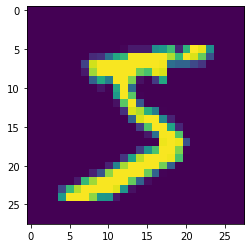

In [78]:
plt.imshow(x_train[0]);

In [79]:
# color is between 0-255
x_train[0].max()

255

In [80]:
# divide everything by 255 to avoid using massive numbers in data set (i.e. we are normalizing)
x_train.dtype

dtype('uint8')

In [81]:
x_train = (x_train.astype(float)/255)

In [87]:
# every pixel is a parameter, so the network has 784 parameters (784 = 28*28)
x_train = x_train.reshape(nimg, img_row*img_col)
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)
y_train = x_train.copy()
y_test = x_test.copy()

In [88]:
x_train.shape

(60000, 784)

In [89]:
# Building a variational autoencoder network. Does unsupervised work on data set
# Autoencoder goes from large to small in term of layer inputs. 
# Encoder outputs a lower dimensional representation z of the data x
# Decoder learns how to reconstruct x given z

In [90]:
model_digits = Sequential()

In [91]:
# Encoder Porttion
model_digits.add(layers.Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits.add(layers.Dense(64, activation="relu"))
# Decoder Portion
model_digits.add(layers.Dense(128, activation="relu"))
model_digits.add(layers.Dense(img_row*img_col, activation="linear"))

In [92]:
model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [93]:
model_digits.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [99]:
# normally x_train, y_train
# normalize and reshape x_test
history = model_digits.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1085 - val_loss: 7368.5327
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1082 - val_loss: 7356.5903
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1079 - val_loss: 7344.7920
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1076 - val_loss: 7333.0815
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1073 - val_loss: 7321.4170
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1070 - val_loss: 7309.7407
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1067 - val_loss: 7298.0151
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1064 - val_loss: 7286.2070
Epoch 9/20
600/600 [==============================] - 3s 6ms/step - loss: 0.1062 - val_loss: 7274.2690
Epoch 10/20
600/600 [==============================] - 3s 6ms/step - loss

# Always look at the loss

In [100]:
history.history['loss']

[0.10849915444850922,
 0.10819927603006363,
 0.10790297389030457,
 0.10760927200317383,
 0.10731767117977142,
 0.10702714323997498,
 0.10673721879720688,
 0.1064472645521164,
 0.10615690797567368,
 0.10586544126272202,
 0.10557249933481216,
 0.10527762770652771,
 0.10498019307851791,
 0.1046799048781395,
 0.10437624156475067,
 0.104068823158741,
 0.10375717282295227,
 0.10344094038009644,
 0.10311977565288544,
 0.10279331356287003]

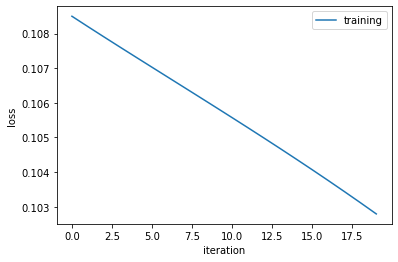

In [104]:
plt.plot(np.array(history.history['loss']), label='training')
#plt.plot(np.array(history.history['val_loss']), label='validation')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend();

In [98]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)